In [2]:
import turicreate

In [3]:
data=turicreate.SFrame('data.csv')

Finished parsing file /Users/Anish/Desktop/data.csv

Parsing completed. Parsed 19 lines in 0.03935 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Anish/Desktop/data.csv

Parsing completed. Parsed 19 lines in 0.00667 secs.

In [4]:
data

Number_of_Restaurants,Food_waste_Saved,Cost
1,10,50
2,22,99
3,44,153
4,52,183
6,77,214
7,82,267
8,121,318
9,135,368
10,156,418
11,183,467


In [5]:
data.show()

Materializing SFrame

In [6]:
training_set, test_set = data.random_split(.7,seed=0)

In [7]:
ml_model = turicreate.linear_regression.create(training_set,target='Cost',features=['Food_waste_Saved','Number_of_Restaurants'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 15

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.006762     | 33.485758          | 14.581740                       |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [8]:
ml_model.evaluate(test_set)

{'max_error': 19.838143572904812, 'rmse': 12.412160431457792}

In [9]:
user_kgs=int(input("How many kilograms of food: "))

How many kilograms of food: 1283


In [10]:
import math

In [11]:
user_no=int(input("How many restaurants: "))

How many restaurants: 31


In [12]:
answer=math.floor(ml_model.predict(turicreate.SFrame({'Food_waste_Saved':[user_kgs],'Number_of_Restaurants':[user_no]}))[0])

In [13]:
print('Hence, by using our platform, your organization can save around',answer,'dollars!')

Hence, by using our platform, your organization can save around 1377 dollars!


In [14]:
turicreate.show(data[0:18]['Number_of_Restaurants'],data[0:18]['Cost'])

Materializing X axis SArray

Materializing Y axis SArray

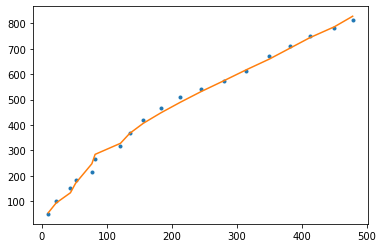

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data['Food_waste_Saved'],data['Cost'],'.',
        data['Food_waste_Saved'],ml_model.predict(data),'-')